In [6]:
import pandas as pd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
import os


# for warning message

import warnings
warnings.filterwarnings("ignore")

In [8]:
path = "../data/BrentOilPrices.csv"
data = pd.read_csv(path)

In [10]:
data.head()


,Date,Price
0,20-May-87,18.63
1,21-May-87,18.45
2,22-May-87,18.55
3,25-May-87,18.60
4,26-May-87,18.63


In [12]:
data.describe()

,Price
count,9011.000000
mean,48.420782
std,32.860110
min,9.100000
25%,19.050000
50%,38.570000
75%,70.090000
max,143.950000


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9011 entries, 0 to 9010
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    9011 non-null   object 
 1   Price   9011 non-null   float64
dtypes: float64(1), object(1)
memory usage: 140.9+ KB


In [15]:
#change Date to datetie format
data['Date']=pd.to_datetime(data.Date)

In [16]:
data.dtypes

Date     datetime64[ns]
Price           float64
dtype: object

In [17]:
# reset index as Date 

data.set_index('Date',inplace = True)

data.head()

,Price
Date,
1987-05-20,18.63
1987-05-21,18.45
1987-05-22,18.55
1987-05-25,18.60
1987-05-26,18.63


<Axes: xlabel='Date'>

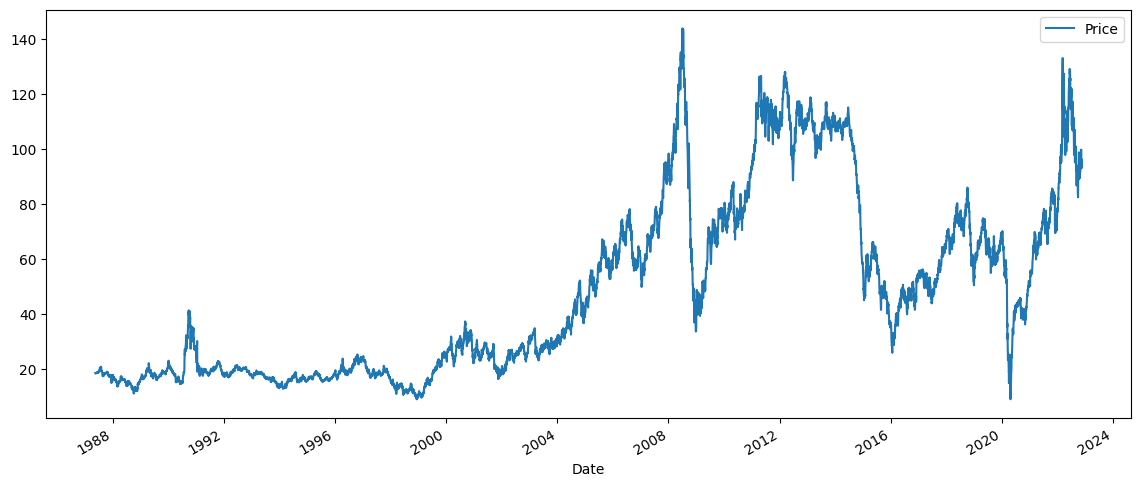

In [19]:
# plot data set

data.plot(figsize = (14,6))

In [23]:
# Taking resample monthly with sum
df_resample = data.resample('M').sum()
df_resample.head()

,Price
Date,
1987-05-31,148.64
1987-06-30,396.07
1987-07-31,456.70
1987-08-31,398.57
1987-09-30,402.89


<Figure size 640x480 with 0 Axes>

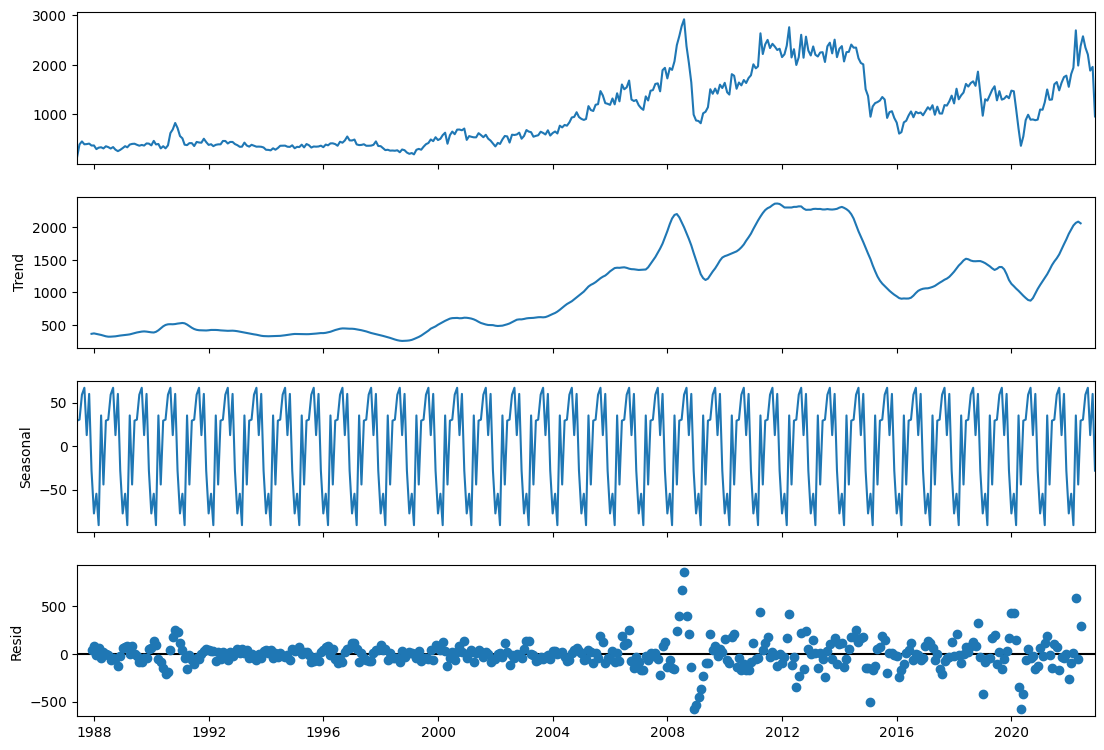

In [30]:
# Decompose to find trend,seasonality,redsidual and observed 

from statsmodels.tsa.seasonal import seasonal_decompose

decompose = seasonal_decompose(df_resample, period=12)
fig = plt.figure()
fig = decompose.plot()
fig.set_size_inches(12,8)